In [1]:
import pandas_datareader.data as web

In [2]:
import datetime
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2022,12,1)
df = web.DataReader('GOOGL','stooq',start,end)

In [3]:
df.sort_index(inplace=True,ascending=True) # 排序，ascending默认为True，正序
df.dropna(inplace=True)

In [4]:
predict_count = int(len(df)*0.02) # 预测数为30
df['label'] = df['Close'].shift(-predict_count)# 构建标签列 监督学习回归
print(df)

                 Open      High        Low      Close       Volume    label
Date                                                                       
2004-08-19    2.50000    2.6015    2.39900    2.50850  894076000.0  4.94000
2004-08-20    2.52525    2.7270    2.51250    2.70775  457144000.0  4.81975
2004-08-23    2.76875    2.8370    2.72625    2.73500  365488000.0  5.06800
2004-08-24    2.78100    2.7900    2.58925    2.62175  305252000.0  4.86250
2004-08-25    2.62400    2.7000    2.59700    2.65000  183956000.0  4.83775
...               ...       ...        ...        ...          ...      ...
2022-11-25   98.24000   98.6400   97.40000   97.46000    9701441.0      NaN
2022-11-28   97.03630   97.5800   95.61000   96.05000   26252433.0      NaN
2022-11-29   95.73000   96.1200   94.11000   95.19000   20061720.0      NaN
2022-11-30   94.82000  101.0400   94.42000  100.99000   43647481.0      NaN
2022-12-01  101.02000  102.2500  100.25000  100.99000   28687096.0      NaN

[4604 rows 

In [5]:
X = df.drop(['label'],axis=1) # 设置样本数据
y = df['label'][:-predict_count] # 设置标签数据

In [6]:
print(y)

Date
2004-08-19      4.94000
2004-08-20      4.81975
2004-08-23      5.06800
2004-08-24      4.86250
2004-08-25      4.83775
                ...    
2022-07-18     97.46000
2022-07-19     96.05000
2022-07-20     95.19000
2022-07-21    100.99000
2022-07-22    100.99000
Name: label, Length: 4512, dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # 数据标准化
scale.fit(X)
x = scale.transform(X)
print(X)

                 Open      High        Low      Close       Volume
Date                                                              
2004-08-19    2.50000    2.6015    2.39900    2.50850  894076000.0
2004-08-20    2.52525    2.7270    2.51250    2.70775  457144000.0
2004-08-23    2.76875    2.8370    2.72625    2.73500  365488000.0
2004-08-24    2.78100    2.7900    2.58925    2.62175  305252000.0
2004-08-25    2.62400    2.7000    2.59700    2.65000  183956000.0
...               ...       ...        ...        ...          ...
2022-11-25   98.24000   98.6400   97.40000   97.46000    9701441.0
2022-11-28   97.03630   97.5800   95.61000   96.05000   26252433.0
2022-11-29   95.73000   96.1200   94.11000   95.19000   20061720.0
2022-11-30   94.82000  101.0400   94.42000  100.99000   43647481.0
2022-12-01  101.02000  102.2500  100.25000  100.99000   28687096.0

[4604 rows x 5 columns]


In [8]:
X_lately = X[-predict_count:] # 后三十组数据
X = X[:-predict_count]
print(len(X))
print(len(X_lately))
# print(X_lately)

4512
92


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # 数据集切分
print(len(x_train))
print(len(y_train))

3609
3609


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9526279858464695

In [11]:
predict = model.predict(X_lately)
print(len(predict))
print(predict)

92
[108.50490153 105.82537002 111.24609452 115.66849235 118.03856189
 118.15019221 118.37569831 120.34444732 121.54234991 120.96917509
 119.89762116 119.51056882 123.05290522 120.47926846 124.12130364
 125.55226945 125.07838256 123.61597766 123.28348807 119.30034122
 117.45882005 118.42762981 117.25902694 119.2679846  109.30619543
 112.37645849 110.10597492 109.9889342  111.29797168 108.18754436
 109.01659032 111.65206301 111.05424808 114.07294578 113.90477556
 104.13899551 107.75313798 104.93215622 104.61489144 106.3009453
 103.6060197  100.67694873 103.3041189   99.92495098 101.91140145
  98.41334002 101.12879687  97.74535349  97.88664235 100.90474966
 105.25396614 102.50381732 105.03914839 101.12397981  99.60263236
  99.41317086 100.73215755  97.95073953  96.32458828 103.43702015
 100.9368249  102.38146335 103.00037379 102.29661049 103.0054516
 107.39323504  96.43640466  92.67819055  96.41793284  96.90246293
  88.13115038  85.99684886  83.81443984  86.38551003  90.89519022
  90.4664

In [12]:
import numpy as np
df['predict'] = np.nan
print(df)

                 Open      High        Low      Close       Volume    label  \
Date                                                                          
2004-08-19    2.50000    2.6015    2.39900    2.50850  894076000.0  4.94000   
2004-08-20    2.52525    2.7270    2.51250    2.70775  457144000.0  4.81975   
2004-08-23    2.76875    2.8370    2.72625    2.73500  365488000.0  5.06800   
2004-08-24    2.78100    2.7900    2.58925    2.62175  305252000.0  4.86250   
2004-08-25    2.62400    2.7000    2.59700    2.65000  183956000.0  4.83775   
...               ...       ...        ...        ...          ...      ...   
2022-11-25   98.24000   98.6400   97.40000   97.46000    9701441.0      NaN   
2022-11-28   97.03630   97.5800   95.61000   96.05000   26252433.0      NaN   
2022-11-29   95.73000   96.1200   94.11000   95.19000   20061720.0      NaN   
2022-11-30   94.82000  101.0400   94.42000  100.99000   43647481.0      NaN   
2022-12-01  101.02000  102.2500  100.25000  100.9900

In [13]:
import datetime

# print(df.index[-1])
last_date_st = df.index[-1].timestamp()
next_date_st = last_date_st + 86400
next_date = datetime.datetime.fromtimestamp(next_date_st)
print(last_date_st)

for i in predict:
    next_date = datetime.datetime.fromtimestamp(next_date_st)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    next_date_st += 86400
    
print(df.tail(40))

1669852800.0
                     Open  High  Low  Close  Volume  label     predict
Date                                                                  
2023-01-23 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  105.039148
2023-01-24 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  101.123980
2023-01-25 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN   99.602632
2023-01-26 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN   99.413171
2023-01-27 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  100.732158
2023-01-28 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN   97.950740
2023-01-29 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN   96.324588
2023-01-30 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  103.437020
2023-01-31 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  100.936825
2023-02-01 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  102.381463
2023-02-02 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  103.000374
2023-02-03 08:00:00   NaN   NaN  NaN    NaN     NaN    NaN  102.

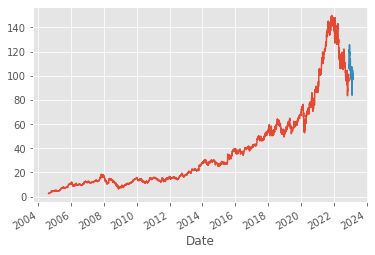

In [14]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
df['Close'].plot()
df['predict'].plot()
plt.show()